Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [49]:
boston = pd.read_csv("boston_housing.csv")
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [50]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [52]:
for column in boston.columns:
    mean_val = boston[column].mean()
    boston[column].fillna(mean_val, inplace=True)
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [53]:
boston.shape

(506, 14)

<AxesSubplot:>

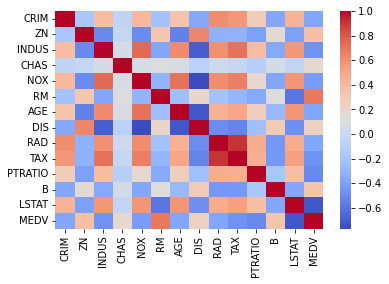

In [54]:
sns.heatmap(boston.corr(), cmap = 'coolwarm')

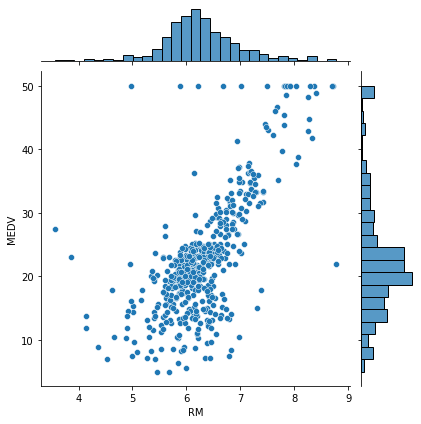

In [55]:
sns.jointplot(boston.RM, boston.MEDV)

### Training model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston['MEDV']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
predicted = model.predict(X_test)
print(predicted)

[20.07714531 35.49156653 17.6181781  18.92194905 20.25604282 20.44949061
 25.52915433 28.99898666 19.70039476 20.22814909 15.96999837 24.02416622
 28.41176371 18.15915896 28.21347863 22.30515741 31.61557544 18.42561292
 12.84776084 21.84958694 21.20513789 46.13025836 11.05298591 19.18281842
 27.15928958 21.67067513 13.00217196 19.21587213 19.28587338 30.4345198
 20.67561127 25.84726067 21.4966727  22.38520328 10.07262732 29.1856016
 23.81373808 23.14429516 17.18840552 16.18206137 31.77444752 16.60442388
 19.03598878 30.40225581 21.64219581 33.8159741  24.85741944 23.87728254
 35.24630003 19.70561259 20.1385165  23.96131832 26.61782567 27.81016419
 36.8187525  19.36087601 26.07122902 23.78616911 33.41681773 24.03245095
 36.62963427 20.95215259 19.01162853 17.13010555 17.12129427 37.4568484
 15.56526292 30.78400533 25.22738159 17.90271691 32.98070737 41.97353386
 15.90350673  9.52310001  5.6462237  21.83642863 21.43930921 34.28498669
 18.89634273 43.25110506 14.55161236 27.56752018 25.50

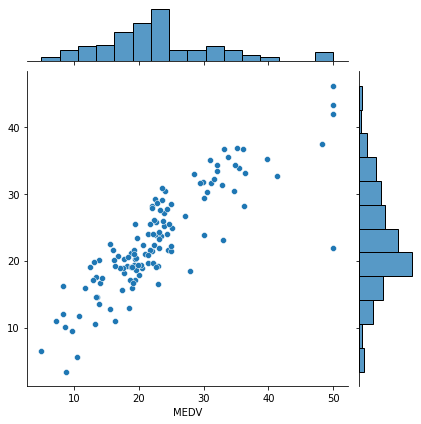

In [61]:
sns.jointplot(y_test, predicted)

### Testing

In [62]:
row = X_test.iloc[1]
val = y_test.iloc[1]
print(row,'\n')
print(val)

CRIM         0.54011
ZN          20.00000
INDUS        3.97000
CHAS         0.00000
NOX          0.64700
RM           7.20300
AGE         81.80000
DIS          2.11210
RAD          5.00000
TAX        264.00000
PTRATIO     13.00000
B          392.80000
LSTAT        9.59000
Name: 260, dtype: float64 

33.8


In [63]:
import warnings
warnings.filterwarnings('ignore') # To hide warning

y_pred = model.predict([row])
print(y_pred[0])

35.491566525494996


In [64]:
print(metrics.mean_absolute_error(y_test, predicted))
print(metrics.mean_squared_error(y_test, predicted))
print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R2 score : " , metrics.r2_score(y_test,predicted))

3.221653713764901
21.056289237676985
4.588713244219668
R2 score :  0.7390414026536356


#### Using less features

In [65]:
X = boston[['INDUS', 'RM', 'PTRATIO', 'LSTAT']]
y = boston['MEDV']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(379, 4)
(127, 4)


In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
predicted = model.predict(X_test)
print(predicted)

[31.60574047 21.93989567 21.6309863  11.98988573 21.24211222 24.26396288
 17.00295872 14.71335886 19.69263796 21.69062192 29.840469   33.69619168
 26.33602568 15.49683661 17.84068884 24.58038565 23.47671857 29.45431154
 19.87253015 28.91415521 12.02083128 27.67886429 22.59053403 -4.28953999
  5.96894705 30.80707806 18.19946303 30.78599427 35.02987524 25.67909663
 19.54155016 18.70931681 21.79792288 16.41042595 17.39925558 22.04375923
 25.87582662 17.13420515 21.09929956 19.36124616 22.06645328 26.46511202
 32.64378703  0.07928248 26.12374893 25.22655696 26.70292105 19.05091003
 14.41149217 17.46825798 18.05877703 34.86745934 23.5159853  29.44569892
 31.59516011 19.78336162  9.77014463 38.20811188 30.63484418 26.00653923
  5.08144914 11.23021968 19.19621743 21.37122066 20.22284759 35.87740713
 27.39100991 22.6524487  27.47857773 20.44781229 12.21818253 26.03180324
 11.80776078  1.03647942 25.35373621 17.07534819 26.8456213  16.95324972
 21.64933355 16.95194518 15.53910557 17.55624452 17

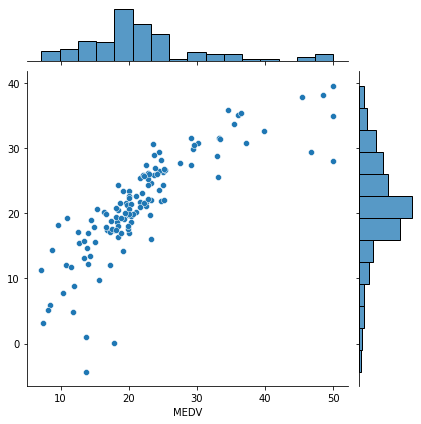

In [69]:
sns.jointplot(y_test, predicted)

In [70]:
print(metrics.mean_absolute_error(y_test, predicted))
print(metrics.mean_squared_error(y_test, predicted))
print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R2 score : " , metrics.r2_score(y_test,predicted))

3.303507618349378
25.64858373839854
5.064443082748442
R2 score :  0.6630640637494987


#### Average r2 score over 10 iterations

In [73]:
r2s = []


for i in range(10):
    X = boston[['INDUS', 'RM', 'PTRATIO', 'LSTAT']]
    y = boston['MEDV']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predicted = model.predict(X_test)

    r2s.append(metrics.r2_score(y_test,predicted))

print("Average r2 score:", sum(r2s)/10)

Average r2 score: 0.6531642035946504
